# Task 3 - IRIS Flower Classification

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## 1. Read the dataset and Basic Data Qquality Checks

In [2]:
import pandas as pd
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

3

In [6]:
df = df.drop_duplicates()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.duplicated().sum()

0

In [8]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='species'>

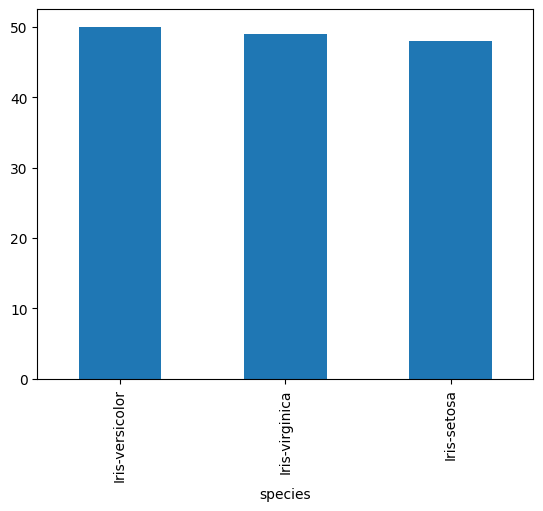

In [9]:
df['species'].value_counts().plot(kind='bar')

## 2. Separate X and Y

In [10]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [11]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


## 3. Create a preprocessing Pipeline for X

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.915509,1.019971,-1.357737,-1.3357
1,-1.157560,-0.128082,-1.357737,-1.3357
2,-1.399610,0.331139,-1.414778,-1.3357
3,-1.520635,0.101529,-1.300696,-1.3357
4,-1.036535,1.249582,-1.357737,-1.3357


## 4. Apply Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [24]:
xtrain.shape

(98, 4)

In [25]:
xtest.shape

(49, 4)

In [20]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
75,0.899867,-0.128082,0.353501,0.253089
67,-0.068334,-0.816914,0.182377,-0.276507
28,-0.794484,0.790361,-1.357737,-1.335700
42,-1.762685,0.331139,-1.414778,-1.335700
62,0.173716,-1.964968,0.125336,-0.276507


In [21]:
ytrain.head()

,species
75,Iris-versicolor
67,Iris-versicolor
28,Iris-setosa
42,Iris-setosa
62,Iris-versicolor


In [22]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
127,0.294741,-0.128082,0.638707,0.782686
53,-0.431409,-1.735357,0.125336,0.120690
140,1.020892,0.101529,1.037996,1.577081
19,-0.915509,1.708804,-1.300696,-1.203301
106,-1.157560,-1.276136,0.410542,0.650287


In [23]:
ytest.head()

,species
127,Iris-virginica
53,Iris-versicolor
140,Iris-virginica
19,Iris-setosa
106,Iris-virginica


## 5. Algorith Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [28]:
dct = {'Logistic': LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier(),
       'KNN':KNeighborsClassifier(),
       'SVM':SVC()}

In [29]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [30]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
train_res = []
test_res = []
train_cv = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Get F1 macro score for train and test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Cross validate the scores
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in lists
    train_res.append(f1_train)
    test_res.append(f1_test)
    train_cv.append(f1_cv)

#### Create dataframe to show above results

In [31]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'KNN', 'SVM'])

In [32]:
res = {'Name':list(dct.keys()),
       'Train':train_res,
       'Test':test_res,
       'Train_CV':train_cv}

In [33]:
df_res = pd.DataFrame(res)
df_res

,Name,Train,Test,Train_CV
0,Logistic,0.990091,0.977658,0.937551
1,Decision Tree,1.000000,0.955840,0.950855
2,Random Forest,1.000000,0.955840,0.960317
3,Gradient Boost,1.000000,0.955840,0.937551
4,KNN,0.970273,0.955840,0.949566
5,SVM,0.970428,0.955840,0.969003


In [34]:
df_res.sort_values(by='Train_CV', ascending=False)

,Name,Train,Test,Train_CV
5,SVM,0.970428,0.955840,0.969003
2,Random Forest,1.000000,0.955840,0.960317
1,Decision Tree,1.000000,0.955840,0.950855
4,KNN,0.970273,0.955840,0.949566
0,Logistic,0.990091,0.977658,0.937551
3,Gradient Boost,1.000000,0.955840,0.937551


#### based on above, SVM model performs better overall. Hence, using SVM model for prediction

In [36]:
# Fit SVM model
best_model = SVC(probability=True)
best_model.fit(xtrain, ytrain)

SVC(probability=True)

## 6. Evaluating the Model

In [37]:
# Accuracy in train
model.score(xtrain, ytrain)

0.9693877551020408

In [38]:
# Accuracy in test
model.score(xtest, ytest)

0.9591836734693877

In [39]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [40]:
ypred_train[0:5]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [41]:
ytrain.head()

,species
75,Iris-versicolor
67,Iris-versicolor
28,Iris-setosa
42,Iris-setosa
62,Iris-versicolor


In [42]:
ypred_test[0:5]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [43]:
ytest.head()

,species
127,Iris-virginica
53,Iris-versicolor
140,Iris-virginica
19,Iris-setosa
106,Iris-virginica


### Plot the confusion matrix for test

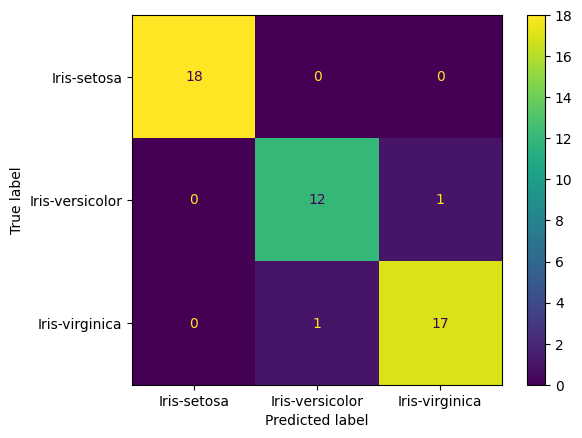

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        49
      macro avg       0.96      0.96      0.96        49
   weighted avg       0.96      0.96      0.96        49

